   emp_id         name         dept    city  salary
0     101  Alice Brown  Electronics  Berlin    5200
1     102  David Smith    Furniture  London    4800
2     103  Maria Lopez  Electronics  Madrid    5100
3     104     John Kim      Fashion   Paris    4500
4     105  Laura Rossi    Furniture    Rome    4700
5     106   Ahmed Khan  Electronics  Berlin    5000
   sale_id  emp_id     product  revenue        date
0        1     101      Laptop     2400  2024-06-10
1        2     102        Sofa     1800  2024-06-11
2        3     103  Smartphone     1100  2024-06-12
3        4     101          TV      900  2024-06-15
4        5     104       Dress      400  2024-06-15
5        6     105       Table     1500  2024-06-16
6        7     106      Laptop     2500  2024-06-17
7        8     102       Chair      700  2024-06-17
8        9     101  Headphones      350  2024-06-18
9       10     103          TV     1000  2024-06-18
   emp_id         name         dept    city  salary  sale_id    

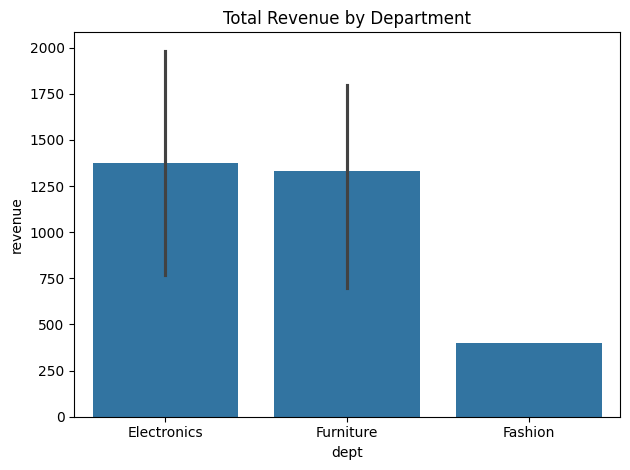

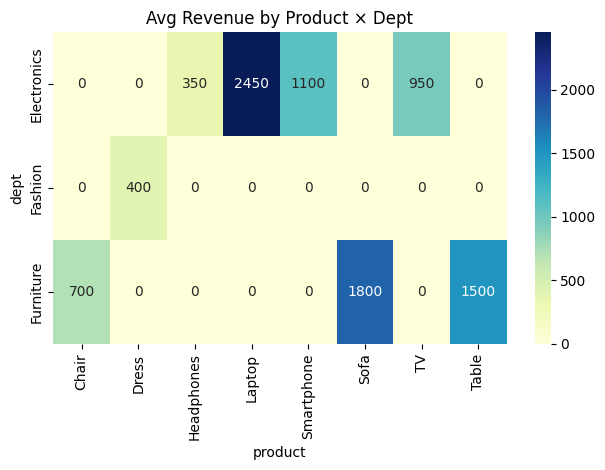

In [27]:
import pandas as pd
import numpy as np


employees = pd.DataFrame({
    "emp_id": [101, 102, 103, 104, 105, 106],
    "name": ["Alice Brown", "David Smith", "Maria Lopez", "John Kim", "Laura Rossi", "Ahmed Khan"],
    "dept": ["Electronics", "Furniture", "Electronics", "Fashion", "Furniture", "Electronics"],
    "city": ["Berlin", "London", "Madrid", "Paris", "Rome", "Berlin"],
    "salary": [5200, 4800, 5100, 4500, 4700, 5000]
})



sales = pd.DataFrame({
    "sale_id": [1,2,3,4,5,6,7,8,9,10],
    "emp_id": [101,102,103,101,104,105,106,102,101,103],
    "product": ["Laptop","Sofa","Smartphone","TV","Dress","Table","Laptop","Chair","Headphones","TV"],
    "revenue": [2400,1800,1100,900,400,1500,2500,700,350,1000],
    "date": [
        "2024-06-10","2024-06-11","2024-06-12","2024-06-15","2024-06-15",
        "2024-06-16","2024-06-17","2024-06-17","2024-06-18","2024-06-18"
    ]
})



employees.columns = employees.columns.str.strip().str.lower().str.replace(" ", "_")
sales.columns = sales.columns.str.strip().str.lower().str.replace(" ", "_")

print(employees)
print(sales)

df = pd.merge(employees,sales,on="emp_id",how="left")

print(df)

df["commission"] = df["revenue"] * 0.05

df["bonus"] = np.select(
    [df["dept"] == "Fashion"],
    [100],
    default= 50
)

df["total_income"] = df["salary"] + df["commission"] + df["bonus"]

print(df)

department_stats = (df
                    .groupby("dept")
                    .agg(
                        total_revenue = ("revenue","sum"),
                        total_commission = ("commission","sum"),
                        average_salary = ("salary","mean")
                    ))

print(department_stats)

pivot = pd.pivot_table(df,
                       values="revenue",
                       index="dept",
                       columns="product",
                       aggfunc="mean",
                       fill_value=0).reset_index()

pivot1 = pd.pivot_table(df,
                       values="revenue",
                       index="dept",
                       columns="product",
                       aggfunc="mean",
                       fill_value=0)
print(pivot)

melted = pd.melt(pivot,id_vars="dept",var_name="product",value_name="avg_revenue")
print(melted)

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df,x="dept",y="revenue")
plt.title("Total Revenue by Department")
plt.tight_layout()
plt.show()

sns.heatmap(pivot1, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Avg Revenue by Product × Dept")
plt.tight_layout()
plt.show()